![](../header.jpg)

# Simulating Non-linear Systems with Control Inputs

Kevin J. Walchko, Phd

20 Nov 2019

---

Most matematical solvers only look at unforced solutions. But what if you want to input a control signal? 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin, sqrt
from pyrk import RK4
from thundercougarfalconbird import Vanderpol, MassSpringDamper

In [3]:
def clamp(x, a, b):
    x = x if x>=a else a
    x = x if x<=b else b
    return x

In [10]:
def crit(m,k,c):
    """
    k: spring const
    c: dampenig coeff
    m: mass
    """
    tau = sqrt(k/m)
    zeta = sqrt((c**2) / (4*m*k))
    print(f"Natural freq: {k/m} rad/sec")
    print(f"Time const: {tau} sec")
    print(f"zeta (critical damping if 1.0): {zeta}")
    # print(f"Dampening System: {D}")
    print(f"Critical dampening coeff for mass and spring const: {2*sqrt(k*m)}")

# Vanderpol Oscillator

Now this doesn't use a controls input, but I know what the output plot should look like, so it is just a test of `pyrk` to ensure it is working correctly.

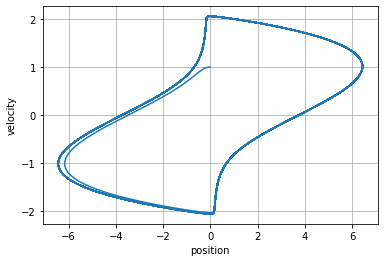

In [5]:
vanderpol = Vanderpol(4.0)

rk = RK4(vanderpol.eqns)
t, y = rk.solve(np.array([0, 1]), .01, 200)

y1 = [x[0] for x in y]
y2 = [x[1] for x in y]

plt.plot(y1, y2)
plt.ylabel('velocity')
plt.xlabel('position')
plt.grid(True)
plt.show()

# Simple Mass-Spring-Damper

Here we set a goal position for the MSD and force it to that position

In [13]:
k = 2.
d = 4.9
m = 3

crit(m,k,d)

msd = MassSpringDamper(m,k,d)

Natural freq: 0.6666666666666666 rad/sec
Time const: 0.816496580927726 sec
zeta (critical damping if 1.0): 1.0002083116364646
Critical dampening coeff for mass and spring const: 4.898979485566356


In [14]:
y_start = np.array([0,1])
goal = 4
step = 0.01

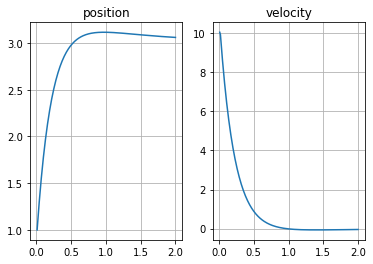

In [15]:
rk = RK4(msd.eqns)
y = y_start
t = 0.0
ierr = 0
last_err = 0

yi = []
ti = []

for i in range(200):
    err = goal - y[1]
    ierr += err*step
    derr = (err - last_err)/step
    u = 5*err + .4*ierr + 10*derr
    
    y = rk(t,y,u,step)
    t += step
    
    ti.append(t)
    yi.append(y)
    last_err = err

v = [x[0] for x in yi] # velocity
p = [x[1] for x in yi] # position

plt.subplot(1,2,1)
plt.plot(ti,p)
plt.title('position')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ti,v)
plt.title('velocity')
plt.grid(True)

# Scipy - broke?

Basically do the same with `scipy` to verify we get the same result as RK45 above.

In [16]:
from scipy.integrate import solve_ivp as ode

/Users/kevin/github/thundercougarfalconbird/thundercougarfalconbird/simple.py:51: RuntimeWarning: invalid value encountered in double_scalars
  accel = (u - c*vel - k*pos)/m


Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops
Oops


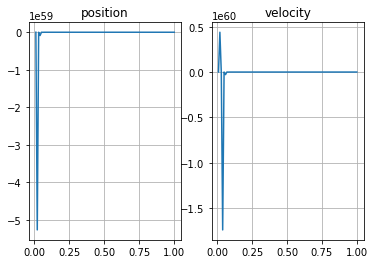

In [19]:
y = y_start
t = 0.0
ierr = 0
last_err = 0

yi = []
ti = []

for i in range(100):
    err = goal - y[1]
    ierr += err*step
    derr = (err - last_err)/step
    u = 5*err + .4*ierr + 10*derr
    
    yy = ode(msd.eqns, y, [t, t+step], args=(u, ))
    if yy.success == False:
        print("Oops")
        
    t += step
    
    y = yy.y[:,-1]
    
    ti.append(t)
    yi.append(y)
    last_err = err

v = [x[0] for x in yi] # velocity
p = [x[1] for x in yi] # position

plt.subplot(1,2,1)
plt.plot(ti,p)
plt.title('position')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ti,v)
plt.title('velocity')
plt.grid(True)

In [61]:
y_start

array([0, 1])

# Conclusion

So I have shown how to simulate EOM with a controls input using python. Both `scipy` and `pyrk` produce similar results.